# 5-5 正規化

# 5-5-1學習資料的確認

In [1]:
import numpy as np
import matplotlib.pyplot as plt

真的函數

In [2]:
def g(x):
    return 0.1 * ( x ** 3 + x ** 2 + x )

適度地準備一些在真的函數中添加有雜訊的學習資料

In [8]:
train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05  
# np.random.randn(train_x.size) = 在-2 ~ 2 間隨機跑出八個數字

繪圖確認

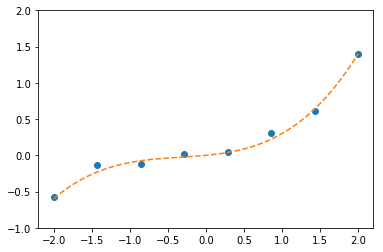

In [10]:
x = np.linspace(-2, 2, 100)
plt.plot(train_x, train_y, 'o')
plt.plot(x, g(x), linestyle='dashed')
plt.ylim(-1, 2)  # y軸範圍 -1 ~ 2
plt.show()

# 5-5-1-將學習資料以10次的多項式學習

# 建立學習資料的矩陣

標準化

In [11]:
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return ( x - mu ) / sigma

train_z = standardize(train_x)

建立學習資料的矩陣

In [17]:
def to_matrix(x):
    return np.vstack([
        np.ones(x.size),
        x,
        x ** 2,
        x ** 3,
        x ** 4,
        x ** 5,
        x ** 6,
        x ** 7,
        x ** 8,
        x ** 9,
        x ** 10,
    ]).T
X = to_matrix(train_z)

參數的初始化

In [24]:
theta = np.random.randn(X.shape[1])

預測函數

In [25]:
def f(x):
    return np.dot(x, theta)

# 不適用於正規化的程式

目標函數

In [26]:
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

學習率 

In [27]:
ETA = 1e-4

誤差

In [28]:
diff = 1

重複學習

In [34]:
error = E(X, train_y)
while diff > 1e-6:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

繪製結果

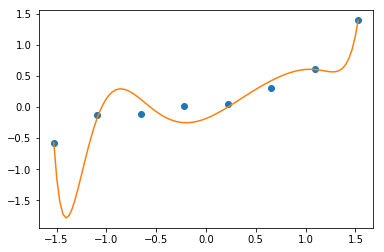

In [37]:
z = standardize(x)
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()

# 適用於正規化的程式

儲存沒有正規化的參數並再次初始化參數

In [38]:
theta1 = theta
theta = np.random.randn(X.shape[1])

正規化常數 

In [39]:
LAMBDA = 1

誤差 

In [40]:
diff = 1

重複學習（帶有正規化項）

In [42]:
error = E(X, train_y)
while diff > 1e-6:
    # 正規化項。由於偏差項是不適用正規化的所以為0
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    # 適用正規化項並更新參數
    theta = theta - ETA * (np.dot(f(X) - train_y, X) + reg_term)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

繪製結果

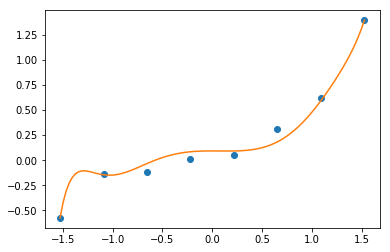

In [43]:
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()

# 繪製適用正規化與不適用的圖形

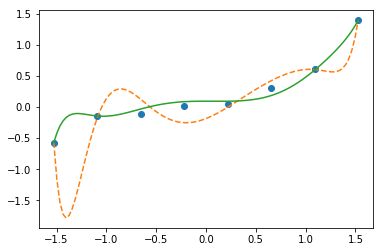

In [51]:
# 儲存有正規化的參數
theta2 = theta

plt.plot(train_z, train_y, 'o')
# 無正規化的繪製結果
theta = theta1

plt.plot(z, f(to_matrix(z)), linestyle='dashed')

# 有正規化的繪製結果
theta = theta2
plt.plot(z, f(to_matrix(z)))

plt.show()